In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import os, glob

In [2]:
!pip install holidays

In [3]:
import holidays
import datetime as dt
from holidays import country_holidays

In [4]:
# get list of files from folder

OUTPUT_FOLDER = '/Users/Rashad/Documents/GitHub/CORE_Project-4_Part_1/Data/seperated/'

crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218
1,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
2,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629
3,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
4,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
...,...,...,...,...,...,...,...,...,...,...,...,...
170854,13195890,08/31/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1411,14.0,1.0,41.928437,-87.700809
170855,13194476,08/31/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,2534,25.0,36.0,41.906188,-87.726483
170856,13194554,08/31/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,233,2.0,5.0,41.801660,-87.601352
170857,13195461,08/31/2023 12:00:00 AM,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,APARTMENT,False,True,312,3.0,20.0,41.776019,-87.615520


# The below dataset represents crimes that happened in Chicago for the year 2020.

In [5]:
### df = pd.read_csv('/Users/Rashad/Documents/GitHub/CORE_Project-4_Part_1/Data/the_stuffChicago-Crime_2020.csv')
### df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884044 entries, 0 to 170858
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 676.7+ MB


# Cleaning and preparing data.

In [7]:
#Dropping columns and making a cleaner dataframe
clean_df = df.drop(columns=['ID','Arrest','Domestic','Beat','Ward','Latitude','Longitude'])
clean_df.head()

,Date,Primary Type,Description,Location Description,District
0,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0
1,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,3.0
2,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,19.0
3,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,10.0
4,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,16.0


In [8]:
#converting column 'Date' datatype to datatime
clean_df['Date'] = pd.to_datetime( clean_df['Date'], format='%m/%d/%Y %I:%M:%S %p' )
display( clean_df.head() )
print()
display( clean_df.info() )

,Date,Primary Type,Description,Location Description,District
0,2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0
1,2001-01-01 13:00:00,ASSAULT,SIMPLE,APARTMENT,3.0
2,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,19.0
3,2001-01-01 13:00:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,10.0
4,2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,16.0



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884044 entries, 0 to 170858
Data columns (total 5 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   District              float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 360.9+ MB


None

In [9]:
#filling NaN values of column 'Location Description'
#clean_df.loc[:'Location Description'].fillna('No Location/Missing',inplace=True)
clean_df['Location Description'].fillna('No Location/Missing',inplace=True)

In [10]:
#making copy of Date column for possible future use.
clean_df['Date2'] = clean_df['Date'].copy()

In [11]:
clean_df.info()   #confirming change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884044 entries, 0 to 170858
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   District              float64       
 5   Date2                 datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 421.1+ MB


In [12]:
#setting 'Date' column as index so that I can perform time series analysis.
clean_df = clean_df.set_index("Date")
clean_df.head(2)

,Primary Type,Description,Location Description,District,Date2
Date,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0,2001-01-01 13:00:00
2001-01-01 13:00:00,ASSAULT,SIMPLE,APARTMENT,3.0,2001-01-01 13:00:00


## (Topic 1) Comparing Police Districts:
* Which district has the most crimes? Which has the least?

In [13]:
district_crime_counts = clean_df['District'].value_counts().to_frame('Total # of Crimes by District')
district_crime_counts

,Total # of Crimes by District
8.0,529438
11.0,505292
6.0,461076
7.0,454559
25.0,448168
4.0,447569
3.0,399815
12.0,391522
9.0,384838
2.0,373788


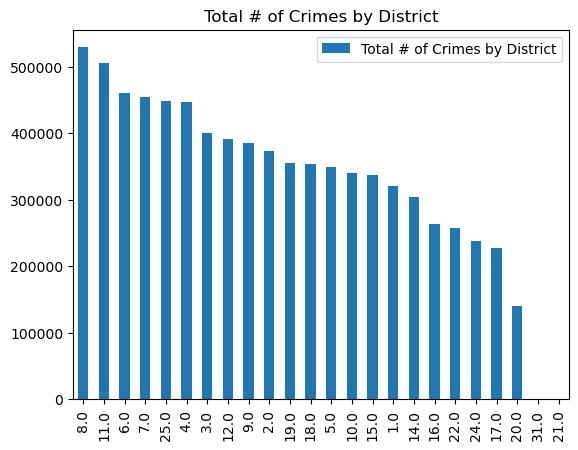

In [14]:
district_crime_counts.plot.bar(title='Total # of Crimes by District');

1. District 8 has the highest number of crimes at 529438.
2. District 21 has the lowest number of crimes at 4.
---

In [15]:
# An additional type of plot added for personal future reference.
district_crime_counts.style.bar('Total # of Crimes by District')

,Total # of Crimes by District
8.000000,529438
11.000000,505292
6.000000,461076
7.000000,454559
25.000000,448168
4.000000,447569
3.000000,399815
12.000000,391522
9.000000,384838
2.000000,373788


---

# (Topic 4) Comparing Months:
* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [16]:
#Extracting month from datetime index and adding a new 'Month_Name' column to dataframe.
#clean_df['Month_by_numb'] = clean_df.index.month
#clean_df['Month_by_numb'] = clean_df['Month_by_numb'].astype('int64')

clean_df['Month_Name'] = clean_df.index.month_name()
clean_df.head(3)

,Primary Type,Description,Location Description,District,Date2,Month_Name
Date,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0,2001-01-01 13:00:00,January
2001-01-01 13:00:00,ASSAULT,SIMPLE,APARTMENT,3.0,2001-01-01 13:00:00,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,19.0,2001-01-01 01:00:00,January


In [17]:
monthly_crime_counts = clean_df['Month_Name'].value_counts().to_frame('Total # of Crimes by Month')
monthly_crime_counts

,Total # of Crimes by Month
July,740808
August,732971
May,704939
June,704097
October,676289
September,668257
March,650267
April,647750
January,622223
November,608967


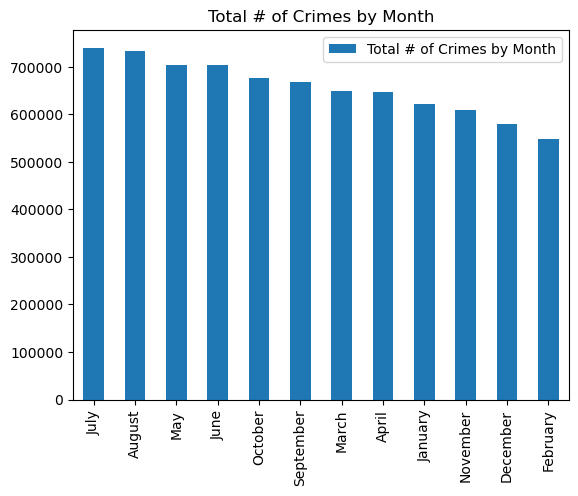

In [18]:
monthly_crime_counts.plot.bar(title='Total # of Crimes by Month');

1. The month of **July** has the **most amount of crimes**.
2. The month of **February** has the **least amount of crimes**.
---

In [19]:
# An additional type of plot added for personal future reference.
monthly_crime_counts.style.bar('Total # of Crimes by Month')

,Total # of Crimes by Month
July,740808
August,732971
May,704939
June,704097
October,676289
September,668257
March,650267
April,647750
January,622223
November,608967


---

* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [20]:
clean_df.head(2)  #quick view of dataframe

,Primary Type,Description,Location Description,District,Date2,Month_Name
Date,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0,2001-01-01 13:00:00,January
2001-01-01 13:00:00,ASSAULT,SIMPLE,APARTMENT,3.0,2001-01-01 13:00:00,January


In [21]:
crimes_by_month = clean_df.groupby('Primary Type')['Month_Name'].value_counts().sort_index()
crimes_by_month

Primary Type       Month_Name
ARSON              April          1133
                   August         1215
                   December        923
                   February        841
                   January         963
                                 ...  
WEAPONS VIOLATION  March          8801
                   May           10757
                   November       7952
                   October        9190
                   September      9435
Name: Month_Name, Length: 415, dtype: int64

In [22]:
#convert to dataframe and reset_index()
plot_crimes_by_month_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_crimes_by_month_df

,Primary Type,Month_Name,# of Crimes
0,ARSON,April,1133
1,ARSON,August,1215
2,ARSON,December,923
3,ARSON,February,841
4,ARSON,January,963
...,...,...,...
410,WEAPONS VIOLATION,March,8801
411,WEAPONS VIOLATION,May,10757
412,WEAPONS VIOLATION,November,7952
413,WEAPONS VIOLATION,October,9190


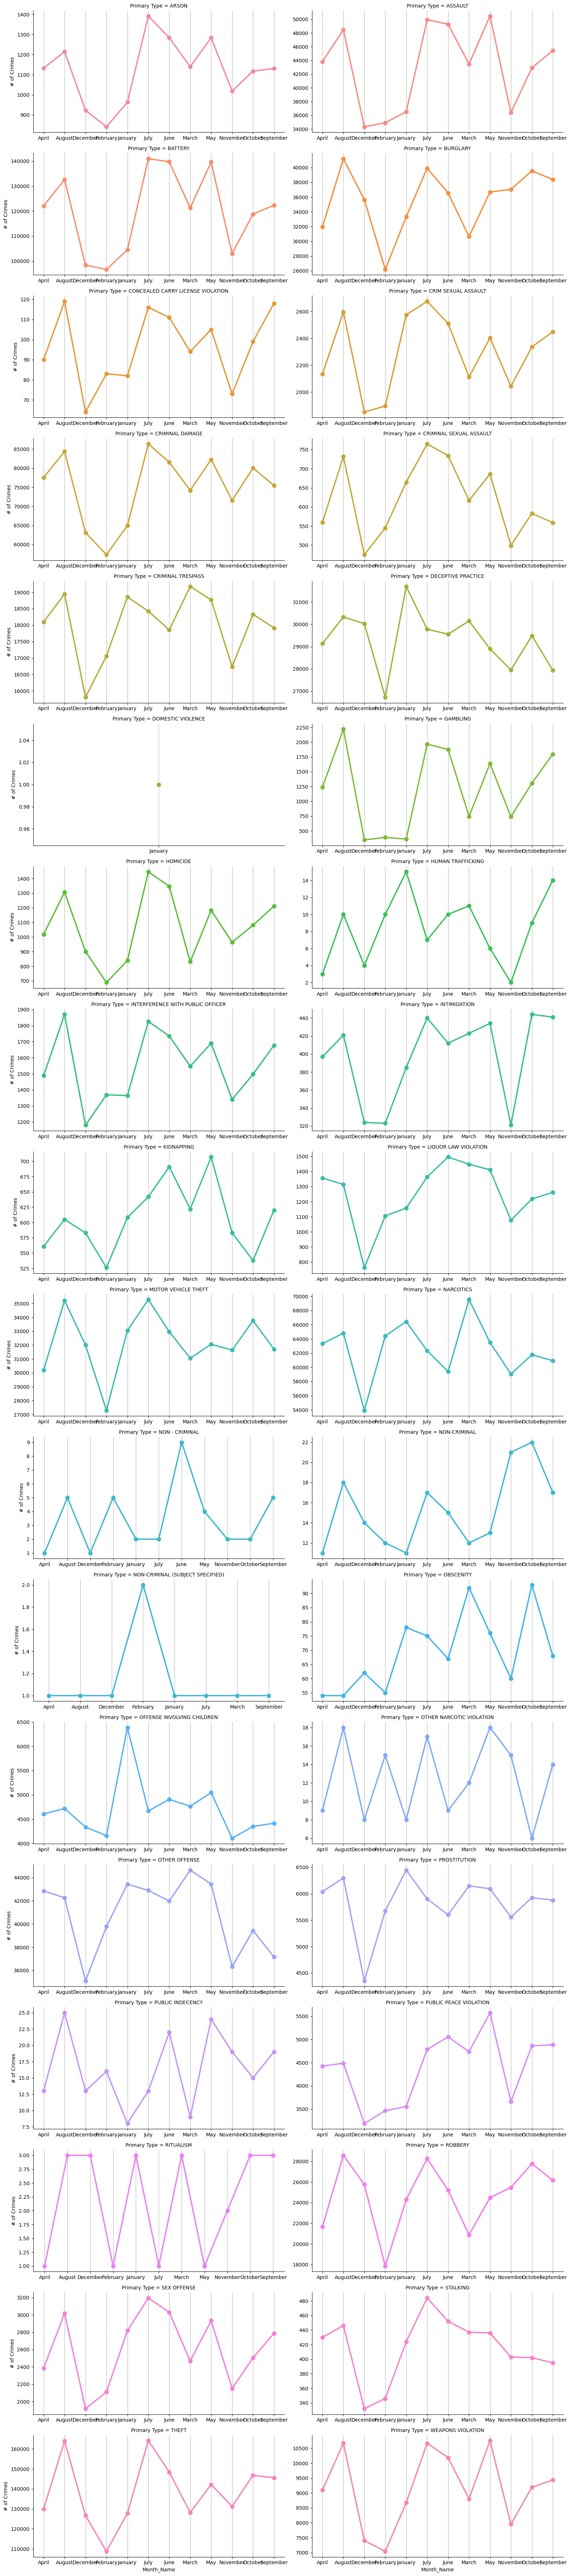

In [23]:
g = sns.catplot(data=plot_crimes_by_month_df, x='Month_Name', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

The below crimes did not follow the pattern of having the most instances in July and the least instances in February.
* CRIMINAL TRESPASS
* GAMBLING
* HUMAN TRAFFICKING
* INTERFERENCE WITH PUBLIC OFFICER
* LIQUOR LAW VIOLATION
* NARCOTICS
* CRIMINAL
* NON-CRIMINAL
* NON-CRIMINAL (SUBJECT SPECIFIED)
* OBSCENITY
* OTHER NARCOTIC VIOLATION
* OTHER OFFENSE
* PROSTITUTION
* PUBLIC INDECENCY
* PUBLIC PEACE VIOLATION
___

# (Topic 5) Comparing Holidays:
* Are there any holidays that show an increase in the # of crimes?
* Are there any holidays that show a decrease in the # of crimes?

In [24]:
clean_df.head(2)  #quick view of dataframe

,Primary Type,Description,Location Description,District,Date2,Month_Name
Date,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0,2001-01-01 13:00:00,January
2001-01-01 13:00:00,ASSAULT,SIMPLE,APARTMENT,3.0,2001-01-01 13:00:00,January


In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7884044 entries, 2001-01-01 13:00:00 to 2023-08-31 00:00:00
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Primary Type          object        
 1   Description           object        
 2   Location Description  object        
 3   District              float64       
 4   Date2                 datetime64[ns]
 5   Month_Name            object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 421.1+ MB


In [26]:
## making a date range that covers full dataset
all_days = pd.date_range(clean_df['Date2'].min(), clean_df['Date2'].max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', length=8278, freq='D')

In [27]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [28]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 00:00:00


"New Year's Day"

In [29]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [30]:
## Saving holiday types as columns
clean_df["US Holiday"] = [us_holidays.get(day) for day in clean_df['Date2']]
clean_df.head()

,Primary Type,Description,Location Description,District,Date2,Month_Name,US Holiday
Date,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,22.0,2001-01-01 13:00:00,January,New Year's Day
2001-01-01 13:00:00,ASSAULT,SIMPLE,APARTMENT,3.0,2001-01-01 13:00:00,January,New Year's Day
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,19.0,2001-01-01 01:00:00,January,New Year's Day
2001-01-01 13:00:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,10.0,2001-01-01 13:00:00,January,New Year's Day
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,16.0,2001-01-01 01:00:00,January,New Year's Day


In [31]:
holiday_crime = clean_df['US Holiday'].value_counts()
holiday_crime

New Year's Day                                     33708
Independence Day                                   23491
Labor Day                                          22165
Memorial Day                                       21865
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         18593
Washington's Birthday                              18230
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5527
Christmas Day (Observed)                            4929
Juneteenth National Independence Day                2181
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

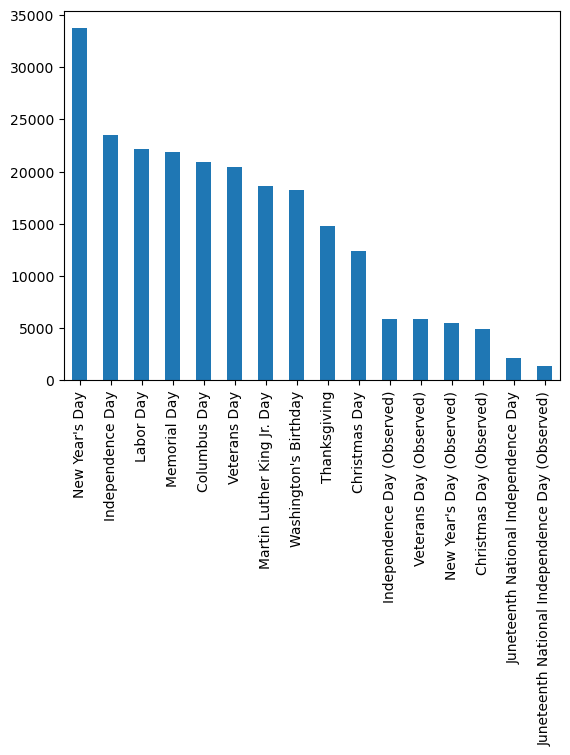

In [32]:
holiday_crime.plot.bar();

* Are there any holidays that show an increase in the # of crimes?
    * **The holiday that has the most instances of crimes is New Year's Day.**
* Are there any holidays that show a decrease in the # of crimes?
    * **The holiday that has the least instances of crimes is Juneteenth National Independence Day (Observed).**